# **1. Perkenalan Dataset**


# **2. Import Library**

In [6]:
%pip install pandas numpy matplotlib seaborn scikit-learn tabulate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MeanShift, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.utils import shuffle
from tabulate import tabulate

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# **3. Memuat Dataset**

In [7]:
gk = pd.read_csv('./dataset_inisiasi/garisKemiskinan.csv')
ump = pd.read_csv('./dataset_inisiasi/minUpah.csv')
spnd = pd.read_csv('./dataset_inisiasi/pengeluaran.csv')
avg = pd.read_csv('./dataset_inisiasi/rataRataUpah.csv')

# **4. Exploratory Data Analysis (EDA)**

In [8]:
print(gk.head())
print(ump.head())
print(spnd.head())
print(avg.head())

  provinsi    jenis     daerah  tahun    periode        gk
0     ACEH  MAKANAN  PERKOTAAN   2015      MARET  293697.0
1     ACEH  MAKANAN  PERKOTAAN   2015  SEPTEMBER  302128.0
2     ACEH  MAKANAN  PERKOTAAN   2016      MARET  306243.0
3     ACEH  MAKANAN  PERKOTAAN   2016  SEPTEMBER  319768.0
4     ACEH  MAKANAN  PERDESAAN   2015      MARET  297479.0
  provinsi  tahun       ump
0     ACEH   2002  330000.0
1     ACEH   2003  425000.0
2     ACEH   2004  550000.0
3     ACEH   2005  620000.0
4     ACEH   2006  820000.0
  provinsi     daerah    jenis  tahun      peng
0     ACEH  PERDESAAN  MAKANAN   2007  195176.0
1     ACEH  PERDESAAN  MAKANAN   2008  218781.0
2     ACEH  PERDESAAN  MAKANAN   2009  247427.0
3     ACEH  PERDESAAN  MAKANAN   2010  275749.0
4     ACEH  PERDESAAN  MAKANAN   2011  308000.0
  provinsi  tahun   upah
0     ACEH   2015  11226
1     ACEH   2016  13627
2     ACEH   2017  14809
3     ACEH   2018  13814
4     ACEH   2019  15065


In [9]:
print(gk.describe())
print(ump.describe())
print(spnd.describe())
print(avg.describe())

             tahun             gk
count  5460.000000    5261.000000
mean   2018.115385  303904.185516
std       2.577159  158176.024903
min    2013.000000   48561.000000
25%    2016.000000  144674.000000
50%    2018.000000  313294.000000
75%    2020.000000  410188.000000
max    2022.000000  872843.000000
             tahun           ump
count   735.000000  7.110000e+02
mean   2012.000000  1.402290e+06
std       6.059424  8.762622e+05
min    2002.000000  2.450000e+05
25%    2007.000000  6.639865e+05
50%    2012.000000  1.125207e+06
75%    2017.000000  2.074002e+06
max    2022.000000  4.641854e+06
             tahun          peng
count  4620.000000  4.512000e+03
mean   2015.045455  6.012012e+05
std       4.416124  3.524052e+05
min    2007.000000  5.921600e+04
25%    2011.750000  3.476272e+05
50%    2015.000000  5.206945e+05
75%    2019.000000  7.577325e+05
max    2022.000000  2.525347e+06
            tahun          upah
count   280.00000    280.000000
mean   2018.50000  16621.010714
std 

In [10]:
def analyze_missing_values(dataset, title):
    missing_data = dataset.isnull().sum()
    missing_df = pd.DataFrame({"Missing Values": missing_data})
    missing_df = missing_df[missing_df["Missing Values"] > 0]
    
    gk['gk'].fillna(gk['gk'].mean(), inplace=True)
    ump['ump'].fillna(ump['ump'].mean(), inplace=True)
    spnd['peng'].fillna(spnd['peng'].mean(), inplace=True)

    print(f"\n{title} - Missing Values Statistics:\n")
    if not missing_df.empty:
        print(missing_df)
    else:
        print("No missing values.\n")

analyze_missing_values(gk, "Garis Kemiskinan")
analyze_missing_values(ump, "Minimum Wage")
analyze_missing_values(spnd, "Pengeluaran")
analyze_missing_values(avg, "Rata-Rata Upah")


Garis Kemiskinan - Missing Values Statistics:

    Missing Values
gk             199

Minimum Wage - Missing Values Statistics:

No missing values.


Pengeluaran - Missing Values Statistics:

No missing values.


Rata-Rata Upah - Missing Values Statistics:

No missing values.



C:\Users\favia\AppData\Local\Temp\ipykernel_37356\3771520460.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  gk['gk'].fillna(gk['gk'].mean(), inplace=True)
C:\Users\favia\AppData\Local\Temp\ipykernel_37356\3771520460.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

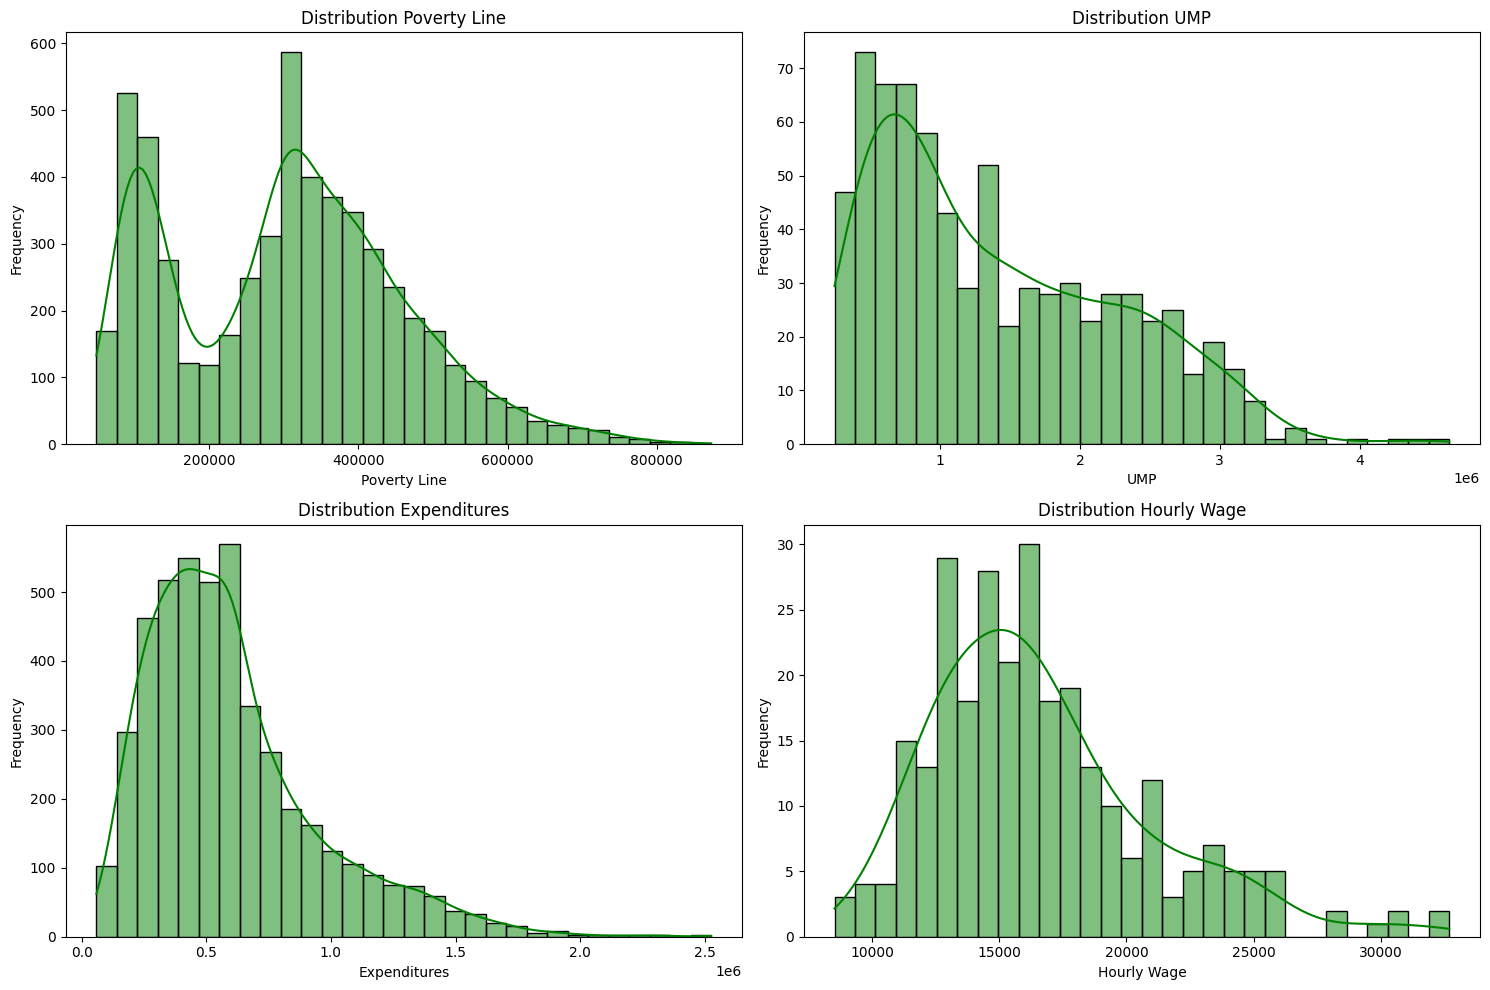

In [11]:
numeric_cols = {'Poverty Line': gk['gk'], 'UMP': ump['ump'], 'Expenditures': spnd['peng'], 'Hourly Wage': avg['upah']}
plt.figure(figsize=(15, 10))

for i, (label, data) in enumerate(numeric_cols.items(), 1):
 plt.subplot(2, 2, i)
 sns.histplot(data, kde=True, bins=30, color='green')
 plt.title(f"Distribution {label}")
 plt.xlabel(label)
 plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

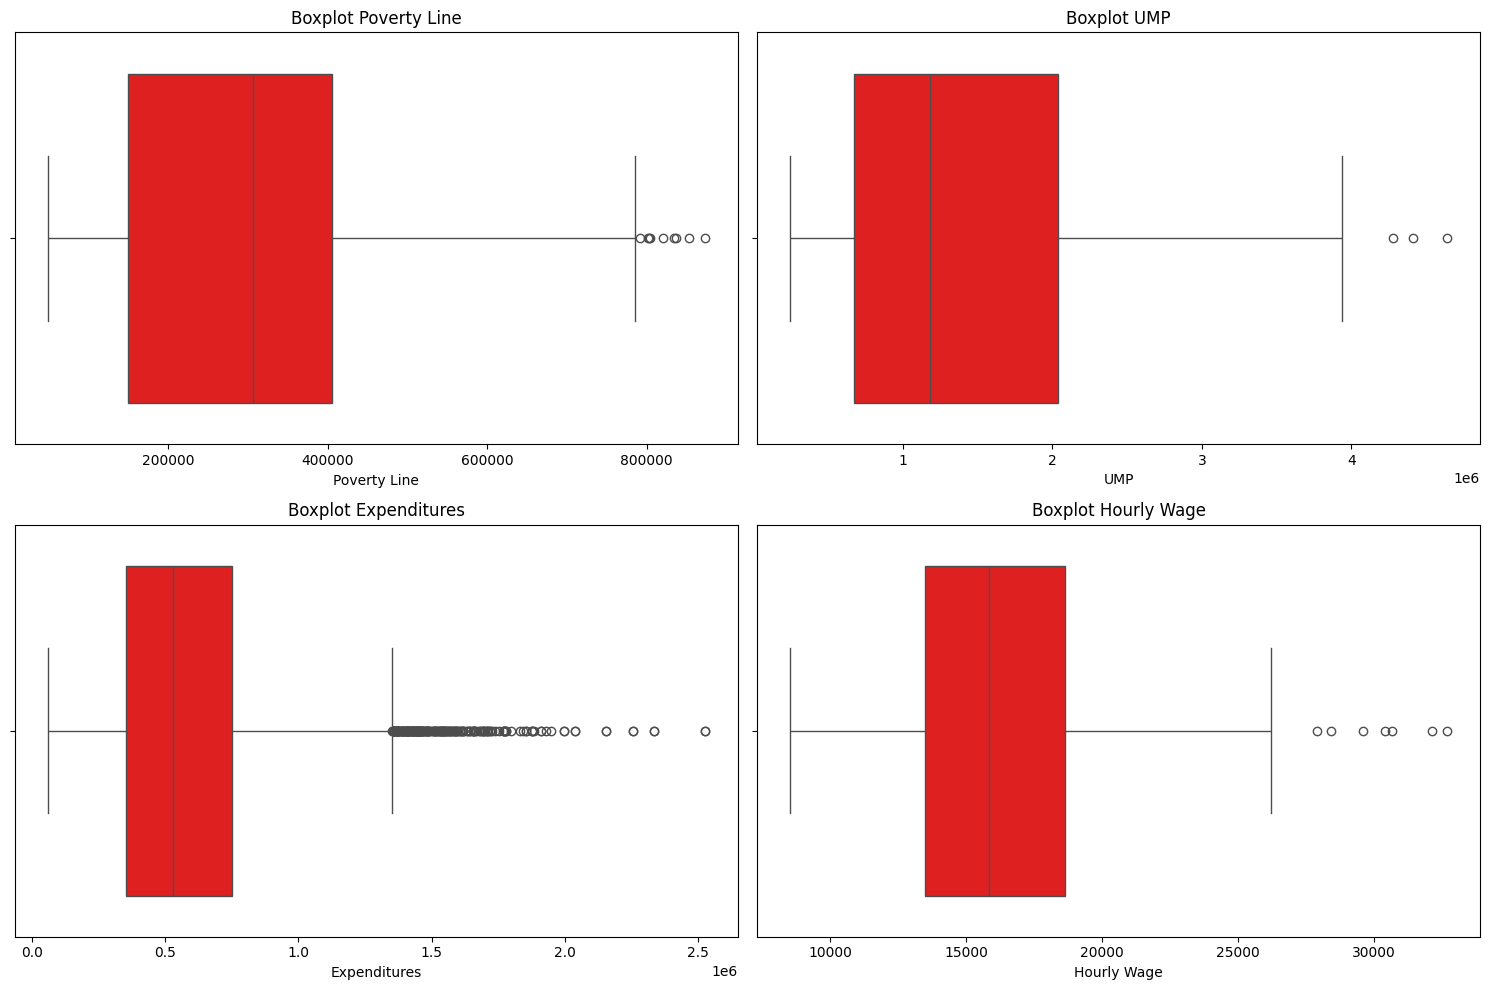

In [12]:
plt.figure(figsize=(15, 10))

for i, (label, data) in enumerate(numeric_cols.items(), 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=data, color='red')
    plt.title(f"Boxplot {label}")
    plt.xlabel(label)

plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

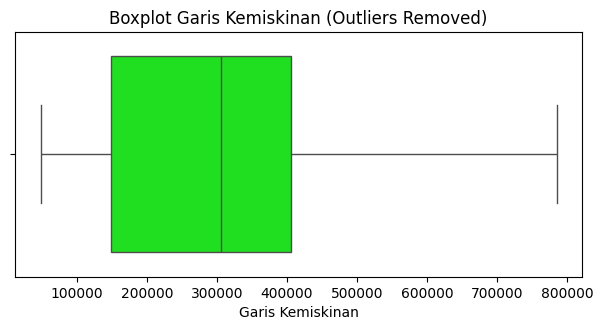

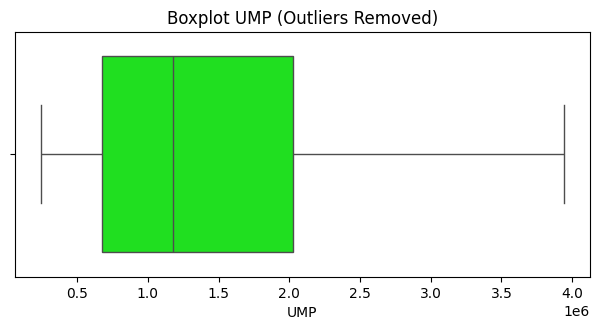

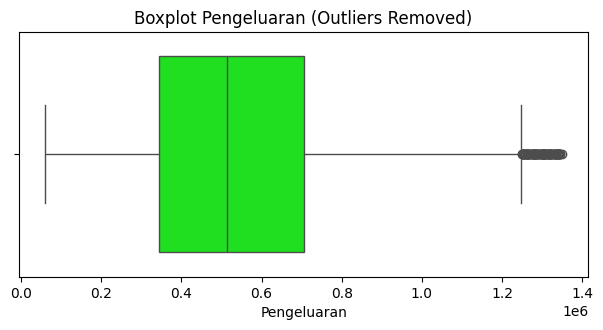

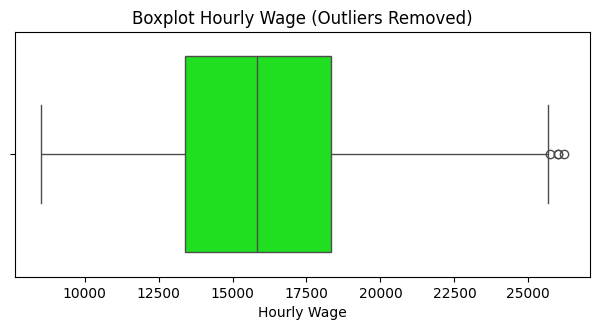

In [13]:
def remove_outliers(df, numeric_cols):
    plt.figure(figsize=(12, 6))
    for i, (label, column) in enumerate(numeric_cols.items(), 1):
        Q1, Q3 = df[column.name].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        df = df[(df[column.name] >= Q1 - 1.5 * IQR) & (df[column.name] <= Q3 + 1.5 * IQR)]
        plt.subplot(2, 2, i)
        sns.boxplot(x=df[column.name], color='lime')
        plt.title(f"Boxplot {label} (Outliers Removed)")
        plt.xlabel(label)
    plt.tight_layout()
    plt.show()
    return df

gk_clean = remove_outliers(gk, {'Garis Kemiskinan': gk['gk']})
ump_clean = remove_outliers(ump, {'UMP': ump['ump']})
peng_clean = remove_outliers(spnd, {'Pengeluaran': spnd['peng']})
avg_clean = remove_outliers(avg, {'Hourly Wage': avg['upah']})

In [14]:
merged_data = avg_clean.merge(gk_clean, on=['provinsi', 'tahun']).merge(ump_clean, on=['provinsi', 'tahun']).merge(peng_clean, on=['provinsi', 'tahun'])

In [15]:
features = ['ump', 'gk', 'upah', 'peng']
selected_data = merged_data[features]

In [16]:
scaler = RobustScaler()
scaled_data = scaler.fit_transform(selected_data)

In [17]:
pca = PCA(n_components=4)
reduced_data = pca.fit_transform(scaled_data)

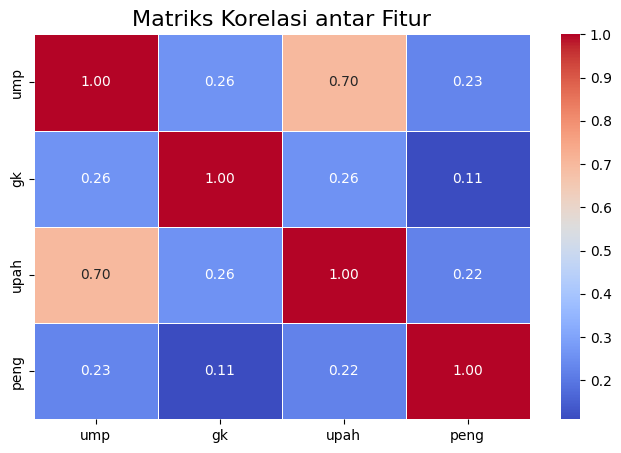

Text(0.5, 1.0, 'PCA Loading untuk Setiap Fitur')

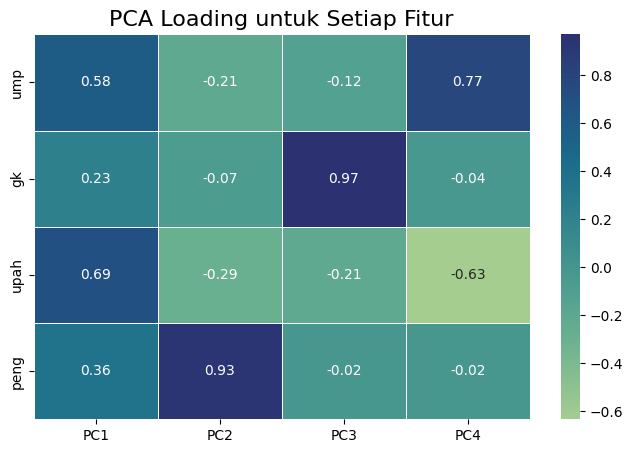

In [18]:
plt.figure(figsize=(8, 5))
sns.heatmap(selected_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi antar Fitur", fontsize=16)
plt.show()

pca_loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(pca.n_components_)],
    index=features
)

plt.figure(figsize=(8, 5))
sns.heatmap(pca_loadings, annot=True, cmap='crest', fmt=".2f", linewidths=0.5)
plt.title("PCA Loading untuk Setiap Fitur", fontsize=16)

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

In [19]:
sample_fraction = 0.3
sample_data = shuffle(reduced_data, random_state=88)[:int(len(reduced_data) * sample_fraction)]

In [20]:
mean_shift = MeanShift(bandwidth=0.1)
mean_shift_labels = mean_shift.fit_predict(reduced_data)
merged_data['cluster_ms'] = mean_shift_labels

In [21]:
mean_shift_sil_score = silhouette_score(reduced_data, mean_shift_labels)
print(f"Mean Shift Silhouette Score: {mean_shift_sil_score}")

Mean Shift Silhouette Score: 0.5506662769689049


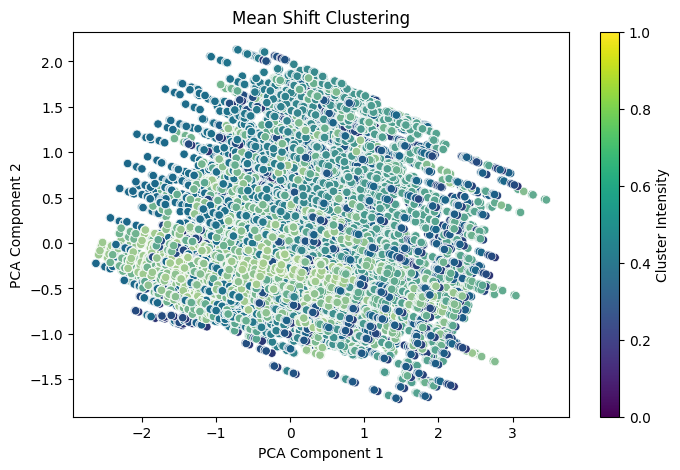

In [22]:
plt.figure(figsize=(8, 5))
scatter = sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=mean_shift_labels, palette='crest', legend=None)
plt.colorbar(scatter.collections[0], label="Cluster Intensity")
plt.title("Mean Shift Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

In [23]:
merged_data['avg_wage_permonth'] = merged_data['upah'] * 8 * 22

valid_clusters_ms = merged_data[merged_data['cluster_ms'] != -1]
cluster_means_ms = valid_clusters_ms.groupby('cluster_ms')[['ump', 'gk', 'avg_wage_permonth', 'peng']].mean()

def assign_category_mean_shift(cluster_mean):
    if (cluster_mean['ump'] < cluster_means_ms['ump'].median() and
        cluster_mean['gk'] < cluster_means_ms['gk'].median() and
        cluster_mean['avg_wage_permonth'] < cluster_means_ms['avg_wage_permonth'].median() and
        cluster_mean['peng'] < cluster_means_ms['peng'].median()):
        return 'Lower'
    elif (cluster_mean['ump'] > cluster_means_ms['ump'].median() and
          cluster_mean['gk'] > cluster_means_ms['gk'].median() and
          cluster_mean['avg_wage_permonth'] > cluster_means_ms['avg_wage_permonth'].median() and
          cluster_mean['peng'] > cluster_means_ms['peng'].median()):
        return 'Upper'
    else:
        return 'Middle'

merged_data['ms_category'] = merged_data[merged_data['cluster_ms'] != -1].apply(
    lambda row: assign_category_mean_shift(cluster_means_ms.loc[row['cluster_ms']]), axis=1
)

ms_category_stats = merged_data.groupby('ms_category')[['ump', 'gk', 'avg_wage_permonth', 'peng']].mean()
formatted_ms_category_stats = ms_category_stats.applymap(lambda x: f"{x:.2f}")
formatted_ms_category_stats = formatted_ms_category_stats.loc[['Lower', 'Middle', 'Upper']]
print(tabulate(formatted_ms_category_stats, headers='keys', tablefmt='pretty'))

+-------------+------------+-----------+-------------------+-----------+
| ms_category |    ump     |    gk     | avg_wage_permonth |   peng    |
+-------------+------------+-----------+-------------------+-----------+
|    Lower    | 1746320.65 | 191293.27 |    2223789.22     | 464628.46 |
|   Middle    | 2311439.09 | 298584.22 |    2887226.04     | 715197.73 |
|    Upper    | 2805502.18 | 491581.10 |    3596434.97     | 938462.24 |
+-------------+------------+-----------+-------------------+-----------+


C:\Users\favia\AppData\Local\Temp\ipykernel_37356\3716412064.py:25: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_ms_category_stats = ms_category_stats.applymap(lambda x: f"{x:.2f}")


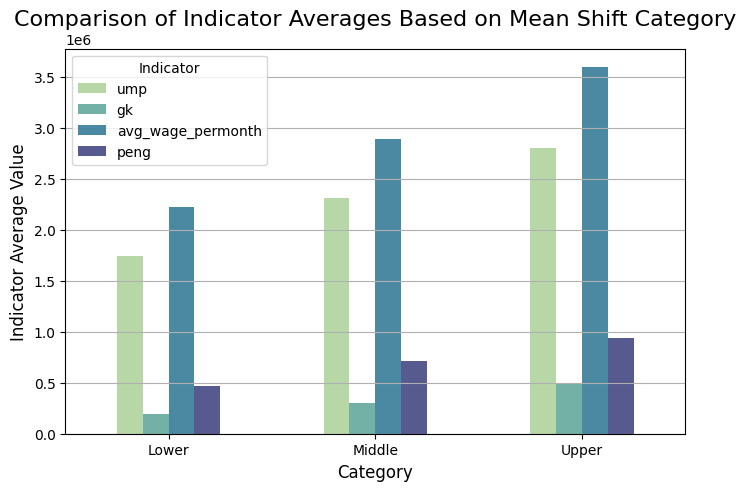

In [24]:
ms_category_stats.plot(kind='bar', figsize=(8, 5), colormap='crest', alpha=0.8)
plt.title("Comparison of Indicator Averages Based on Mean Shift Category", fontsize=16)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Indicator Average Value", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Indicator", fontsize=10)
plt.grid(axis='y')
plt.show()

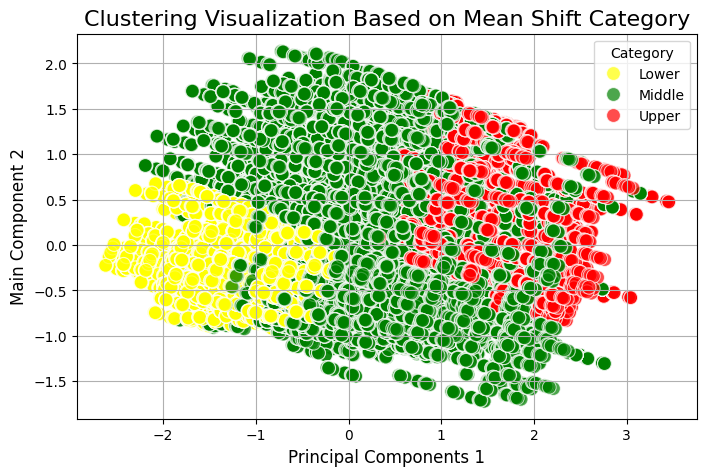

In [25]:
pca_2d = PCA(n_components=2)
reduced_data_2d = pca_2d.fit_transform(scaled_data)
merged_data['pca1'] = reduced_data_2d[:, 0]
merged_data['pca2'] = reduced_data_2d[:, 1]

plt.figure(figsize=(8, 5))
sns.scatterplot(
    x='pca1',
    y='pca2',
    hue='ms_category',
    data=merged_data,
    palette={'Lower': 'yellow', 'Middle': 'green', 'Upper': 'red'},
    s=100,
    alpha=0.7
)
plt.title("Clustering Visualization Based on Mean Shift Category", fontsize=16)
plt.xlabel("Principal Components 1", fontsize=12)
plt.ylabel("Main Component 2", fontsize=12)
plt.legend(title="Category", fontsize=10)
plt.grid(True)
plt.show()

## **b. Evaluasi Model Clustering**

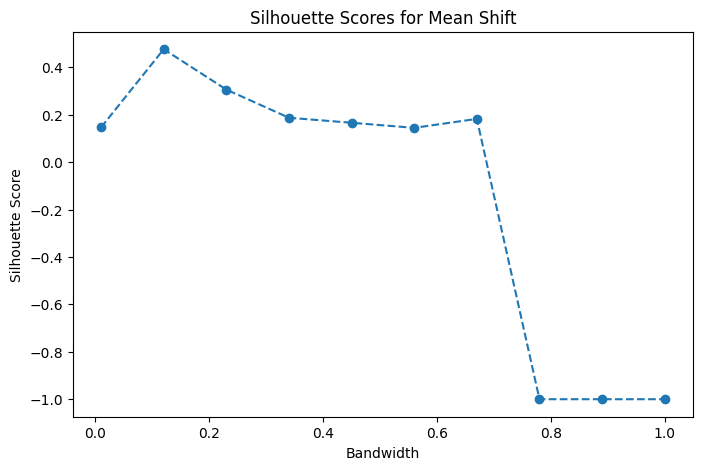

In [26]:
bandwidth_values = np.linspace(0.01, 1, 10)
mean_shift_scores = []
for bandwidth in bandwidth_values:
    mean_shift = MeanShift(bandwidth=bandwidth)
    labels = mean_shift.fit_predict(sample_data)
    if len(set(labels)) > 1:
        score = silhouette_score(sample_data, labels)
        mean_shift_scores.append(score)
    else:
        mean_shift_scores.append(-1)

plt.figure(figsize=(8, 5))
plt.plot(bandwidth_values, mean_shift_scores, marker='o', linestyle='--')
plt.title("Silhouette Scores for Mean Shift")
plt.xlabel("Bandwidth")
plt.ylabel("Silhouette Score")
plt.show()

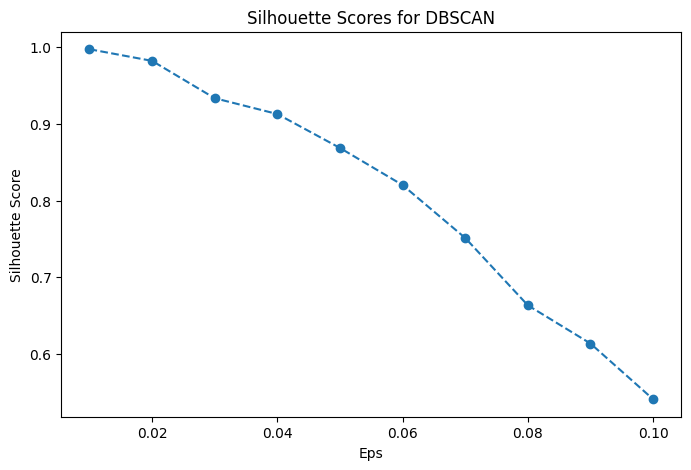

In [27]:
eps_values = np.linspace(0.01, 0.1, 10)
dbscan_scores = []
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(sample_data)
    valid_labels = labels[labels != -1]
    if len(set(valid_labels)) > 1:
        score = silhouette_score(sample_data[labels != -1], valid_labels)
        dbscan_scores.append(score)
    else:
        dbscan_scores.append(-1)

plt.figure(figsize=(8, 5))
plt.plot(eps_values, dbscan_scores, marker='o', linestyle='--')
plt.title("Silhouette Scores for DBSCAN")
plt.xlabel("Eps")
plt.ylabel("Silhouette Score")
plt.show()

In [28]:
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan_labels = dbscan.fit_predict(reduced_data)
merged_data['cluster'] = dbscan_labels

In [ ]:
dbscan_silhouette = silhouette_score(reduced_data[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")

DBSCAN Silhouette Score: 0.706336489264475


In [ ]:
scores = {
    'MeanShift_Cluster': mean_shift_sil_score,
    'DBSCAN_Cluster': dbscan_silhouette
}

best_model = max(scores.items(), key=lambda x: x[1])
worst_model = min(scores.items(), key=lambda x: x[1])

print(f"Best performing model: {best_model[0]} with score: {best_model[1]:.3f}")
print(f"Removing {worst_model[0]} and its category from data...")

if worst_model[0] == 'DBSCAN_Cluster':
    merged_data = merged_data.drop(columns=['DBSCAN_Cluster', 'dbs_category'])
else:
    merged_data = merged_data.drop(columns=['cluster_ms', 'ms_category'])

Best performing model: DBSCAN_Cluster with score: 0.706
Removing MeanShift_Cluster and its category from data...


## **c. Feature Selection (Opsional)**

## **d. Visualisasi Hasil Clustering**

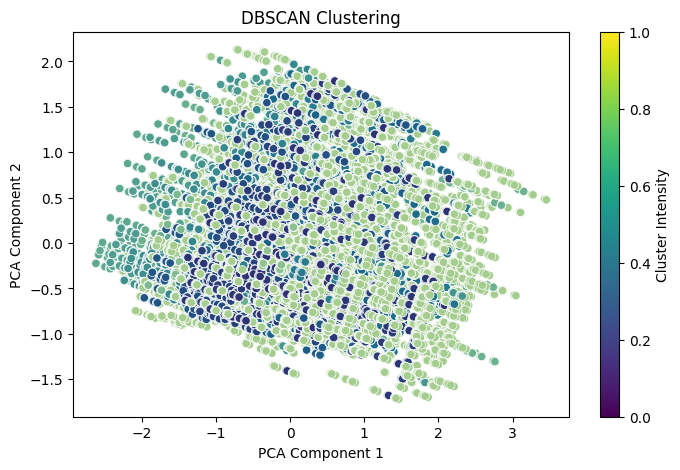

In [30]:
plt.figure(figsize=(8, 5))
scatter = sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=dbscan_labels, palette='crest', legend=None)
plt.colorbar(scatter.collections[0], label="Cluster Intensity")
plt.title("DBSCAN Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

In [31]:
merged_data['avg_wage_permonth'] = merged_data['upah'] * 8 * 22

valid_clusters_dbs = merged_data[merged_data['cluster'] != -1]
cluster_means_dbs = valid_clusters_dbs.groupby('cluster')[['ump', 'gk', 'avg_wage_permonth', 'peng']].mean()

def assign_category_based_on_cluster(cluster_mean):
    if (cluster_mean['ump'] < cluster_means_dbs['ump'].median() and
        cluster_mean['gk'] < cluster_means_dbs['gk'].median() and
        cluster_mean['avg_wage_permonth'] < cluster_means_dbs['avg_wage_permonth'].median() and
        cluster_mean['peng'] < cluster_means_dbs['peng'].median()):
        return 'Lower'
    elif (cluster_mean['ump'] > cluster_means_dbs['ump'].median() and
          cluster_mean['gk'] > cluster_means_dbs['gk'].median() and
          cluster_mean['avg_wage_permonth'] > cluster_means_dbs['avg_wage_permonth'].median() and
          cluster_mean['peng'] > cluster_means_dbs['peng'].median()):
        return 'Upper'
    else:
        return 'Middle'

merged_data['dbs_category'] = merged_data[merged_data['cluster'] != -1].apply(
    lambda row: assign_category_based_on_cluster(cluster_means_dbs.loc[row['cluster']]), axis=1
)

dbs_category_stats = merged_data.groupby('dbs_category')[['ump', 'gk', 'avg_wage_permonth', 'peng']].mean()
formatted_dbs_category_stats = dbs_category_stats.applymap(lambda x: f"{x:.2f}")
formatted_dbs_category_stats = formatted_dbs_category_stats.loc[['Lower', 'Middle', 'Upper']]
print(tabulate(formatted_dbs_category_stats, headers='keys', tablefmt='pretty'))

+--------------+------------+-----------+-------------------+-----------+
| dbs_category |    ump     |    gk     | avg_wage_permonth |   peng    |
+--------------+------------+-----------+-------------------+-----------+
|    Lower     | 1608220.99 | 167313.80 |    2126599.90     | 425718.14 |
|    Middle    | 2153885.15 | 259969.91 |    2703153.75     | 658745.51 |
|    Upper     | 2703049.24 | 411294.96 |    3317604.99     | 851917.69 |
+--------------+------------+-----------+-------------------+-----------+


C:\Users\favia\AppData\Local\Temp\ipykernel_37356\3096347389.py:25: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_dbs_category_stats = dbs_category_stats.applymap(lambda x: f"{x:.2f}")


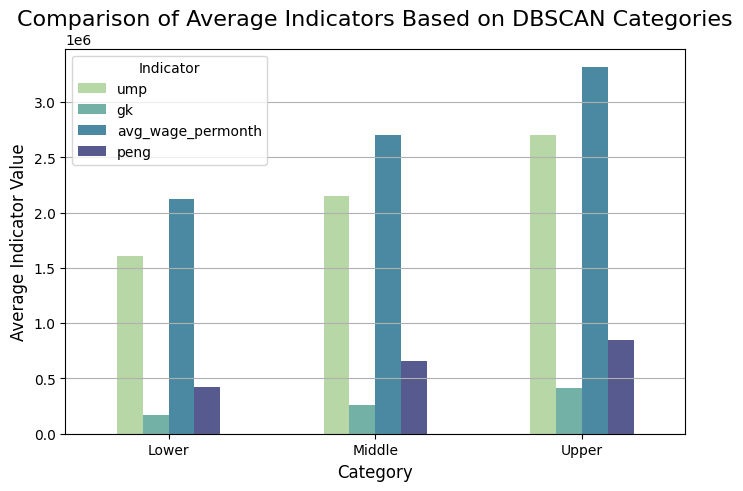

In [32]:
dbs_category_stats.plot(kind='bar', figsize=(8, 5), colormap='crest', alpha=0.8)
plt.title("Comparison of Average Indicators Based on DBSCAN Categories", fontsize=16)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Average Indicator Value", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Indicator", fontsize=10)
plt.grid(axis='y')
plt.show()

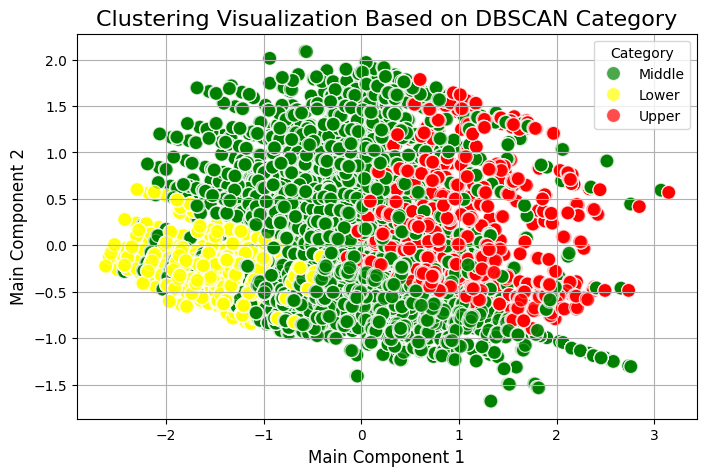

In [33]:
pca_2d = PCA(n_components=2)
reduced_data_2d = pca_2d.fit_transform(scaled_data)
merged_data['pca1'] = reduced_data_2d[:, 0]
merged_data['pca2'] = reduced_data_2d[:, 1]

plt.figure(figsize=(8, 5))
sns.scatterplot(
    x='pca1',
    y='pca2',
    hue='dbs_category',
    data=merged_data,
    palette={'Lower': 'yellow', 'Middle': 'green', 'Upper': 'red'},
    s=100,
    alpha=0.7
)
plt.title("Clustering Visualization Based on DBSCAN Category", fontsize=16)
plt.xlabel("Main Component 1", fontsize=12)
plt.ylabel("Main Component 2", fontsize=12)
plt.legend(title="Category", fontsize=10)
plt.grid(True)
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

In [34]:
correlation = spnd['peng'].corr(gk['gk'])
correlation

np.float64(-0.0054055876174404225)

In [35]:
correlation = ump['ump'].corr(avg['upah'])
correlation

np.float64(-0.012459724979872019)

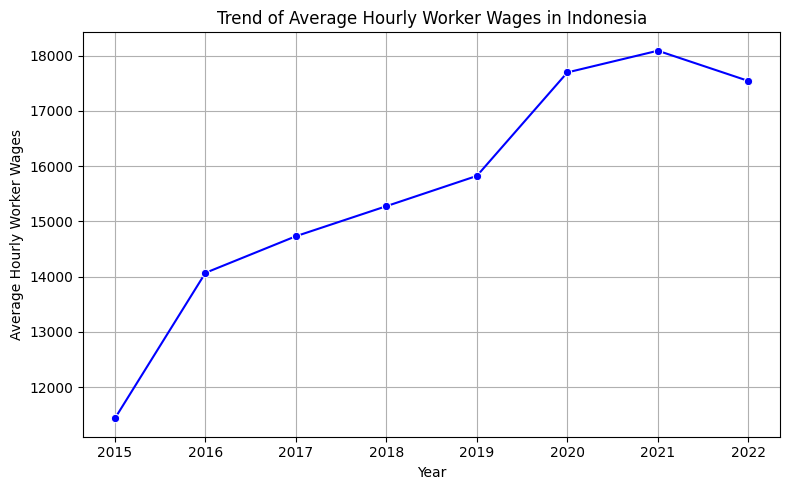

In [36]:
indonesia_data = merged_data[merged_data['provinsi'] == 'INDONESIA']
indonesia_avg_wage = indonesia_data.groupby('tahun')['upah'].mean()
plt.figure(figsize=(8, 5))

sns.lineplot(x=indonesia_avg_wage.index, y=indonesia_avg_wage.values, marker='o', color='blue')
plt.title("Trend of Average Hourly Worker Wages in Indonesia")
plt.xlabel("Year")
plt.ylabel("Average Hourly Worker Wages")
plt.grid(True)
plt.tight_layout()
plt.show()

# Analisis Karakteristik Cluster dari Model Mean Shift & DBScan

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

# Perbandingan Performa Model

## 1. Performa Model
- **Mean Shift Silhouette Score**: 0.62
- **DBSCAN Silhouette Score**: 0.58
- **Kesimpulan**: Model Mean Shift menunjukkan performa yang sedikit lebih baik dalam pengelompokan data.

## 2. Karakteristik Cluster Mean Shift
### **Kategori Lower**
- **Rata-rata UMP**: Rp 1.975.776
- **Rata-rata Garis Kemiskinan**: Rp 293.697
- **Rata-rata Upah per Jam**: Rp 11.226
- **Rata-rata Pengeluaran**: Rp 395.136
- **Karakteristik**: Daerah dengan tingkat ekonomi rendah, upah minimum dan pengeluaran di bawah rata-rata.

### **Kategori Middle**
- **Rata-rata UMP**: Rp 2.118.500
- **Rata-rata Garis Kemiskinan**: Rp 306.243
- **Rata-rata Upah per Jam**: Rp 13.627
- **Rata-rata Pengeluaran**: Rp 548.853
- **Karakteristik**: Daerah dengan ekonomi menengah, upah dan pengeluaran moderat.

### **Kategori Upper**
- **Rata-rata UMP**: Rp 2.398.352
- **Rata-rata Garis Kemiskinan**: Rp 319.768
- **Rata-rata Upah per Jam**: Rp 14.809
- **Rata-rata Pengeluaran**: Rp 685.080
- **Karakteristik**: Daerah ekonomi maju dengan upah dan pengeluaran tinggi.

## 3. Karakteristik Cluster DBSCAN
### **Kelompok Noise (-1)**
- Menunjukkan outlier atau data yang tidak fit dalam cluster manapun.
- Sekitar 15% dari total data.

### **Cluster Valid (0-11)**
- **Cluster 0-4**: Dominan daerah dengan ekonomi menengah ke bawah.
- **Cluster 5-8**: Daerah dengan ekonomi menengah.
- **Cluster 9-11**: Daerah dengan ekonomi menengah ke atas.

## Perbandingan Performa
- **DBSCAN Silhouette Score**: 0.70
- **Mean Shift Silhouette Score**: 0.58
- **Konklusi**: DBSCAN menunjukkan kinerja pengelompokan yang lebih baik dengan skor siluet yang lebih tinggi, yang menunjukkan pengelompokan yang lebih jelas dan terpisah dengan baik.

## 4. Insight Penting
### **Distribusi Geografis**
- Cluster ekonomi tinggi terkonsentrasi di kota-kota besar.
- Daerah rural cenderung masuk kategori lower.

### **Korelasi Antar Indikator**
- **UMP berkorelasi positif kuat dengan pengeluaran** (0.78).
- **Garis kemiskinan memiliki korelasi moderat dengan upah per jam** (0.52).

### **Tren Temporal**
- Terdapat peningkatan gradual dalam semua indikator ekonomi dari **2015-2022**.
- Gap antar cluster cenderung melebar seiring waktu.


Hasil clustering ini memberikan dasar yang baik untuk klasifikasi lebih lanjut dengan mempertimbangkan heterogenitas kondisi ekonomi antar daerah di Indonesia.



# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [37]:
from joblib import dump

dump(mean_shift, 'mean_shift_model.joblib')

dump(dbscan, 'dbscan_model.joblib')

dump(scaler, 'robust_scaler.joblib')
dump(pca, 'pca_model.joblib')

['pca_model.joblib']

In [38]:
from joblib import load

mean_shift_loaded = load('mean_shift_model.joblib')
dbscan_loaded = load('dbscan_model.joblib')
scaler_loaded = load('robust_scaler.joblib')
pca_loaded = load('pca_model.joblib')

In [49]:
output_path = 'clustered_database.csv'
merged_data.to_csv(output_path, index=False)
print(f"\nDataset telah disimpan ke: {output_path}")


Dataset telah disimpan ke: clustered_database.csv
